<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/6.b.%20Convolutional%20AutoEncoder%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
کد مربوط به ساخت و آموزش یک Autoencoder کانولوشنی (CNN Autoencoder) برای حذف نویز از تصاویر MNIST


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 249ms/step - accuracy: 0.4541 - loss: 0.2305
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - accuracy: 0.7423 - loss: 0.2170
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 222ms/step - accuracy: 0.8023 - loss: 0.1949
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 219ms/step - accuracy: 0.8087 - loss: 0.1646
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.8086 - loss: 0.1419
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 221ms/step - accuracy: 0.8086 - loss: 0.1316
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - accuracy: 0.8094 - loss: 0.1262
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.8084 - loss: 0.1241
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 223ms/step - accuracy: 0.8087 - loss: 0.1219
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - accuracy: 0.8087 - loss: 0.1206
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step


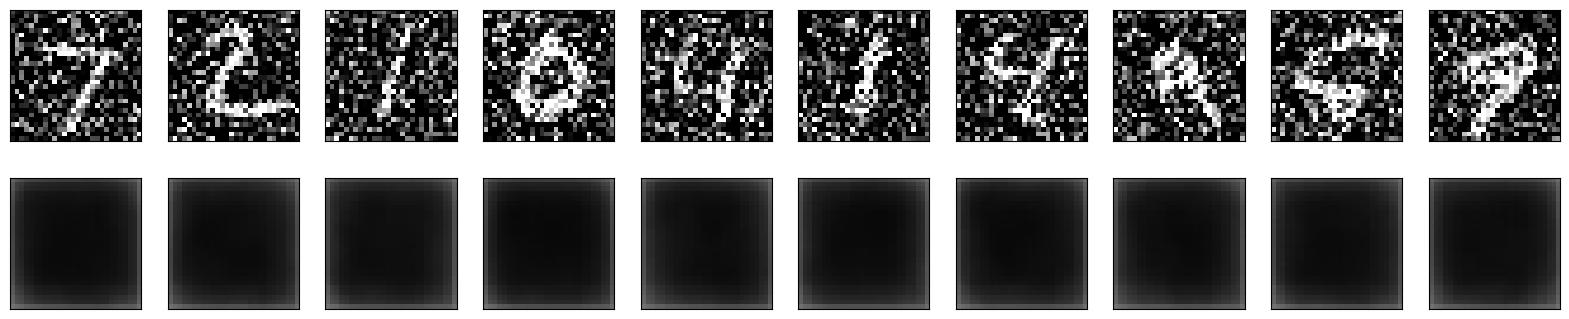

In [ ]:
# وارد کردن کتابخانه‌ها
import matplotlib.pyplot as plt  # برای رسم تصاویر و نمودارها
import numpy as np  # برای عملیات عددی و تولید نویز
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D  # لایه‌های کانولوشن و Pooling و UpSampling
from keras.models import Sequential  # مدل ترتیبی Keras
from keras.datasets import mnist  # دیتاست MNIST (اعداد دست‌نویس)
from keras.optimizers import Adadelta  # بهینه‌ساز Adadelta
from keras import backend as K  # برای بررسی فرمت داده‌ها (channels_first / channels_last)

# بارگذاری دیتاست MNIST
(X_train, _), (X_test, _) = mnist.load_data()  # فقط تصاویر، برچسب‌ها را نادیده می‌گیریم (_)

# بررسی فرمت داده‌ها (کانال اول یا آخر)
if K.image_data_format() == 'channels_first':  # اگر فرمت "کانال اول" باشد
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])  # تغییر شکل داده‌ها
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
    input_shape = (1, X_train.shape[2], X_train.shape[3])  # شکل ورودی مدل
else:  # اگر فرمت "کانال آخر" باشد
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  # تغییر شکل داده‌ها
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)  # شکل ورودی مدل

# نرمال‌سازی تصاویر بین 0 و 1
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# -------------------------------
# اضافه کردن نویز به تصاویر
# -------------------------------
C = 0.5  # ضریب شدت نویز
X_train_noisy = X_train + (C * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape))  # نویز گوسی به تصاویر آموزشی
X_test_noisy = X_test + (C * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape))  # نویز گوسی به تصاویر تست

# -------------------------------
# ساخت مدل Autoencoder کانولوشنی
# -------------------------------
Model = Sequential()  # مدل ترتیبی Keras

# لایه Encoder
Model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))  # کانولوشن 32 فیلتر 3x3
Model.add(MaxPooling2D((2,2), padding='same'))  # کاهش ابعاد با Pooling
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))  # کانولوشن دوم
Model.add(MaxPooling2D((2,2), padding='same'))  # Pooling دوم
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))  # کانولوشن سوم

# لایه Decoder
Model.add(UpSampling2D((2,2)))  # افزایش ابعاد (UpSampling)
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))  # کانولوشن بعد از UpSampling
Model.add(UpSampling2D((2,2)))  # افزایش ابعاد دوم
Model.add(Conv2D(1, (3,3), padding='same', activation='sigmoid'))  # کانولوشن خروجی با فعال‌ساز Sigmoid

# نمایش خلاصه مدل
Model.summary()  # نشان دادن تعداد پارامترها و ساختار مدل

# -------------------------------
# کامپایل مدل
# -------------------------------
Model.compile(optimizer=Adadelta(),  # بهینه‌ساز Adadelta
              loss='mse',  # خطای میانگین مربعات
              metrics=['accuracy'])  # دقت (اختیاری برای Autoencoder)

# -------------------------------
# آموزش مدل
# -------------------------------
Model.fit(X_train_noisy, X_train,  # ورودی = تصاویر نویزی، خروجی = تصاویر اصلی
          epochs=10,  # تعداد دوره‌ها
          batch_size=128)  # اندازه هر دسته

# -------------------------------
# بازسازی تصاویر تست
# -------------------------------
Reconstructed_images = Model.predict(X_test_noisy, batch_size=128)  # بازسازی تصاویر تست نویزی

# -------------------------------
# نمایش تصاویر نویزی و بازسازی شده
# -------------------------------
n = 10  # تعداد تصاویری که نمایش داده می‌شوند
plt.figure(figsize=(20,4))
for i in range(n):
    # تصاویر نویزی
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i,:,:,:].reshape((28,28)), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])

    # تصاویر بازسازی شده
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(Reconstructed_images[i,:,:,:].reshape((28,28)), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
plt.show()


<div dir="rtl" align="right">

📌 خلاصه عملکرد کد

تصاویر MNIST را بارگذاری و نرمال‌سازی می‌کنیم.

نویز گوسی به تصاویر اضافه می‌کنیم تا مدل Denoising Autoencoder آموزش ببیند.

مدل کانولوشنی Autoencoder با لایه‌های Encoder و Decoder ساخته می‌شود.

مدل با خطای MSE آموزش داده می‌شود تا تصاویر نویزی را به تصاویر اصلی بازسازی کند.

تصاویر نویزی و بازسازی شده با هم مقایسه و نمایش داده می‌شوند.